In [54]:
import sys
!{sys.executable} -m pip install h5py


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import h5py
import pandas as pd

In [56]:
filename = "C:/Users/aradh/Desktop/ML Project/N-CMAPSS_DS01-005.h5"
with h5py.File(filename, 'r') as f:
    print("Keys in the file:", list(f.keys()))
    for key in f.keys():
        data = f[key][:]
        print(f"\nData sample from '{key}':")
        df = pd.DataFrame(data)
        print(df.head())
        break

Keys in the file: ['A_dev', 'A_test', 'A_var', 'T_dev', 'T_test', 'T_var', 'W_dev', 'W_test', 'W_var', 'X_s_dev', 'X_s_test', 'X_s_var', 'X_v_dev', 'X_v_test', 'X_v_var', 'Y_dev', 'Y_test']

Data sample from 'A_dev':
     0    1    2    3
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [57]:
with h5py.File(filename, 'r') as f:
    for key in f.keys():
        data = f[key]
        print(f"Key: {key}")
        print(f"Shape: {data.shape}")
        try:
            sample = data[:5]
            print(data[:2])
        except Exception as e:
            print(e)

Key: A_dev
Shape: (4906636, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Key: A_test
Shape: (2735232, 4)
[[7. 1. 1. 1.]
 [7. 1. 1. 1.]]
Key: A_var
Shape: (4,)
[b'unit' b'cycle']
Key: T_dev
Shape: (4906636, 10)
[[ 0.          0.          0.          0.          0.          0.
  -0.00060384  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.00060384  0.          0.          0.        ]]
Key: T_test
Shape: (2735232, 10)
[[ 0.         0.         0.         0.         0.         0.
  -0.0002937  0.         0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
  -0.0002937  0.         0.         0.       ]]
Key: T_var
Shape: (10,)
[b'fan_eff_mod' b'fan_flow_mod']
Key: W_dev
Shape: (4906636, 4)
[[3.01300000e+03 3.76361996e-01 7.03119965e+01 5.22314770e+02]
 [3.02000000e+03 3.76865983e-01 7.03119965e+01 5.22327145e+02]]
Key: W_test
Shape: (2735232, 4)
[[3.00200000e+03 3.56831998e-01 7.54975128e+01 5.20902124e+02]
 [3.01

In [58]:
import numpy as np
with h5py.File(filename, 'r') as f:
    X_s = f['X_s_dev'][:]
    A = f['A_dev'][:]
    T = f['T_dev'][:]
    W = f['W_dev'][:]
    Y = f['Y_dev'][:]
    X_s_cols = [col.decode() if isinstance(col, bytes) else col for col in f['X_s_var'][:]]
    A_cols = [col.decode() if isinstance(col, bytes) else col for col in f['A_var'][:]]
    T_cols = [col.decode() if isinstance(col, bytes) else col for col in f['T_var'][:]]
    W_cols = [col.decode() if isinstance(col, bytes) else col for col in f['W_var'][:]]
X_combined = np.hstack([X_s, A, T, W])
all_featured_cols = X_s_cols + A_cols + T_cols + W_cols
df = pd.DataFrame(X_combined, columns = all_featured_cols)
df['RUL'] = Y
print(df.shape)
print(df.head())

(4906636, 33)
          T24          T30          T48          T50        P15         P2  \
0  618.288596  1470.469798  1849.620676  1269.275585  19.432070  14.484611   
1  618.296355  1470.415593  1849.519871  1269.177159  19.431385  14.484683   
2  618.336514  1470.453853  1849.566139  1269.167353  19.435163  14.488224   
3  618.302173  1470.650929  1850.195069  1269.518670  19.426003  14.477632   
4  618.345228  1470.640421  1849.950988  1269.253972  19.427484  14.478114   

         P21        P24        Ps30         P40  ...  HPC_flow_mod  \
0  19.727990  24.410990  394.701872  401.205188  ...           0.0   
1  19.727295  24.410483  394.629899  401.132851  ...           0.0   
2  19.731130  24.415476  394.667850  401.171401  ...           0.0   
3  19.721830  24.406544  394.773533  401.272707  ...           0.0   
4  19.723334  24.410159  394.732158  401.234620  ...           0.0   

   HPT_eff_mod  HPT_flow_mod  LPT_eff_mod  LPT_flow_mod     alt      Mach  \
0    -0.000604     

In [59]:
df.columns

Index(['T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40',
       'P50', 'Nf', 'Nc', 'Wf', 'unit', 'cycle', 'Fc', 'hs', 'fan_eff_mod',
       'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod', 'HPC_eff_mod',
       'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod',
       'LPT_flow_mod', 'alt', 'Mach', 'TRA', 'T2', 'RUL'],
      dtype='object')

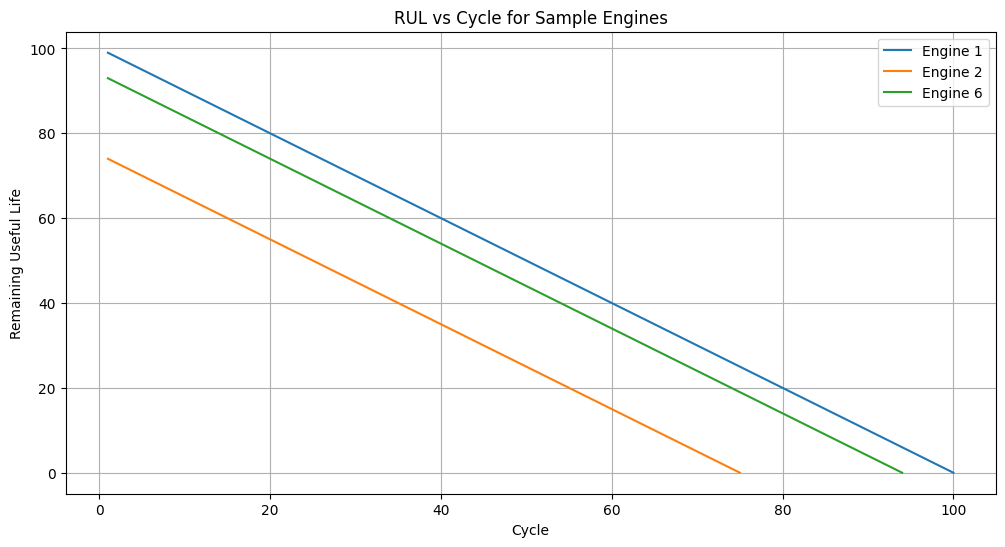

In [60]:
import matplotlib.pyplot as plt
engine_id_col = 'unit'
cycle_col = 'cycle'
sample_units = df[engine_id_col].drop_duplicates().sample(3, random_state=42)
plt.figure(figsize=(12, 6))
for unit in sample_units:
    df_unit = df[df[engine_id_col] == unit]
    plt.plot(df_unit[cycle_col], df_unit['RUL'], label = f"Engine {int(unit)}")
plt.title('RUL vs Cycle for Sample Engines')
plt.xlabel('Cycle')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
missing_values = df.isnull().sum()
print(missing_values)

T24             0
T30             0
T48             0
T50             0
P15             0
P2              0
P21             0
P24             0
Ps30            0
P40             0
P50             0
Nf              0
Nc              0
Wf              0
unit            0
cycle           0
Fc              0
hs              0
fan_eff_mod     0
fan_flow_mod    0
LPC_eff_mod     0
LPC_flow_mod    0
HPC_eff_mod     0
HPC_flow_mod    0
HPT_eff_mod     0
HPT_flow_mod    0
LPT_eff_mod     0
LPT_flow_mod    0
alt             0
Mach            0
TRA             0
T2              0
RUL             0
dtype: int64


In [62]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
feature_cols = ['T24', 'T30', 'T48', 'T50', 'P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf', 'Fc', 'hs', 'fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod',
                'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod', 'LPT_eff_mod', 'LPT_flow_mod', 'TRA', 'T2']
target_col = 'RUL'
units = df['unit'].unique()
train_units, test_units = train_test_split(units, test_size = 0.2, random_state = 42)
train_df = df[df['unit'].isin(train_units)]
test_df = df[df['unit'].isin(test_units)]
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
x_train = train_df[feature_cols]
y_train = train_df[target_col]
x_test = test_df[feature_cols]
y_test = test_df[target_col]
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 10.22
Root Mean Squared Error (RMSE): 12.01
R² Score: 0.76


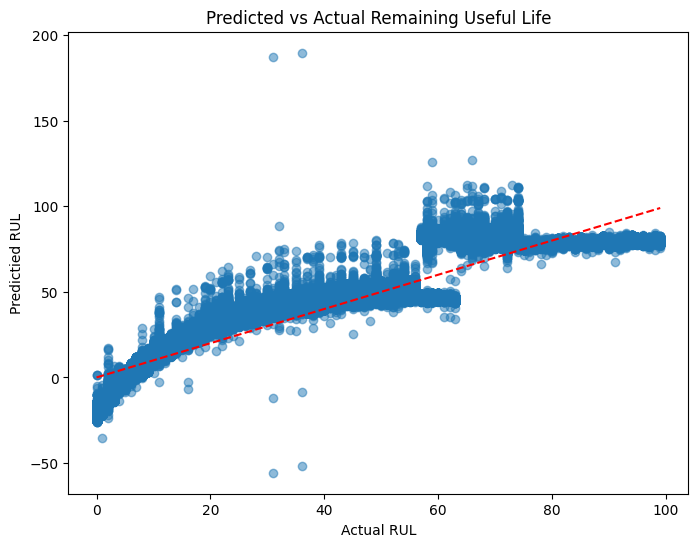

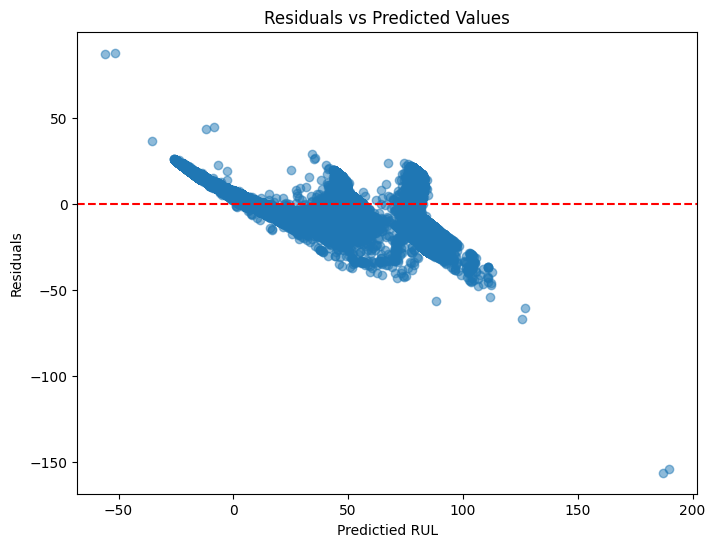

In [65]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Actual RUL')
plt.ylabel('Predictied RUL')
plt.title('Predicted vs Actual Remaining Useful Life')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha = 0.5)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Predictied RUL')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [66]:
coefficients = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_.flatten()}).sort_values(by = 'Coefficient', key = abs, ascending = False)
print(coefficients)

         Feature   Coefficient
8           Ps30 -6.124889e+03
9            P40  5.903457e+03
7            P24 -2.486925e+02
4            P15  2.166577e+02
6            P21  2.166577e+02
13            Wf  2.019785e+02
5             P2 -1.797763e+02
11            Nf  5.435119e+01
1            T30 -4.332110e+01
27            T2  4.254333e+01
2            T48  3.852968e+01
3            T50  3.667888e+01
10           P50 -3.245909e+01
12            Nc -2.603514e+01
22   HPT_eff_mod  2.114645e+01
26           TRA -2.079894e+01
0            T24 -1.902641e+01
15            hs  1.315363e+01
14            Fc  1.675070e+00
16   fan_eff_mod -9.094947e-12
19  LPC_flow_mod  0.000000e+00
18   LPC_eff_mod  0.000000e+00
17  fan_flow_mod  0.000000e+00
20   HPC_eff_mod  0.000000e+00
23  HPT_flow_mod  0.000000e+00
21  HPC_flow_mod  0.000000e+00
25  LPT_flow_mod  0.000000e+00
24   LPT_eff_mod  0.000000e+00


In [67]:
selected_feature = ['Ps30', 'P40', 'P24', 'P15', 'P21', 'Wf', 'P2', 'Nf', 'T30', 'T2', 'T48', 'T50', 'P50', 'Nc', 'HPT_eff_mod']
x_train_sel = x_train[selected_feature]
x_test_sel = x_test[selected_feature]
scaler_sel = StandardScaler()
x_train_sel_scaled = scaler_sel.fit_transform(x_train_sel)
x_test_sel_scaled = scaler_sel.fit_transform(x_test_sel)
model_sel = LinearRegression()
model_sel.fit(x_train_sel_scaled, y_train)
y_pred_sel = model_sel.predict(x_test_sel_scaled)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
mse_sel = mean_squared_error(y_test, y_pred_sel)
rmse_sel = np.sqrt(mse_sel)
r2_sel = r2_score(y_test, y_pred_sel)
print(f"Selected Features MAE: {mae_sel:.2f}")
print(f"Selected Features RMSE: {rmse_sel:.2f}")
print(f"Selected Features R²: {r2_sel:.2f}")

Selected Features MAE: 18.77
Selected Features RMSE: 23.21
Selected Features R²: 0.12


In [68]:
from sklearn.ensemble import RandomForestRegressor
x_train_full_scaled = scaler.fit_transform(x_train)
x_test_full_scaled = scaler.fit_transform(x_test)
rf_model = RandomForestRegressor(n_estimators = 50, random_state = 42, max_depth = 10, n_jobs = -1)
rf_model.fit(x_train_full_scaled, y_train.values.ravel())
y_pred_rf = rf_model.predict(x_test_full_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest MAE: 9.56
Random Forest RMSE: 11.83
Random Forest R²: 0.77


In [69]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x_train.columns

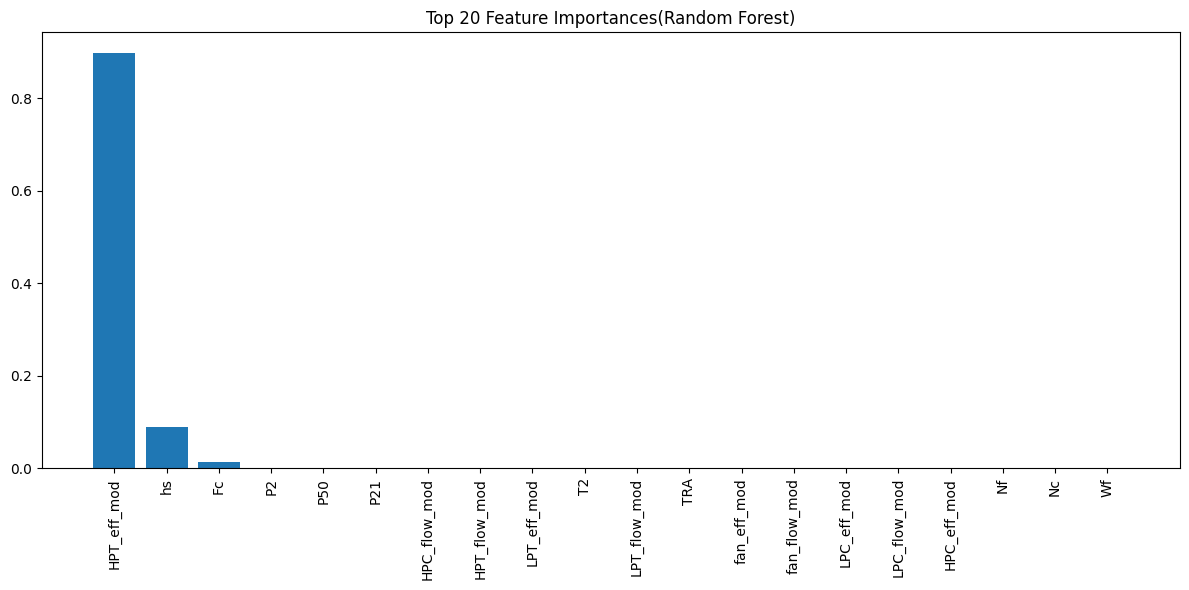

In [70]:
plt.figure(figsize = (12, 6))
plt.title("Top 20 Feature Importances(Random Forest)")
plt.bar(range(20), importances[indices][:20], align = 'center')
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation = 90)
plt.tight_layout()
plt.show()

In [71]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by = 'Importance', ascending = False)
print(importance_df.head(10))

        Feature    Importance
22  HPT_eff_mod  8.971944e-01
15           hs  8.943977e-02
14           Fc  1.309709e-02
5            P2  1.511180e-04
10          P50  1.176484e-04
6           P21  7.129739e-11
3           T50  0.000000e+00
4           P15  0.000000e+00
7           P24  0.000000e+00
2           T48  0.000000e+00


In [72]:
selected_features = ['HPT_eff_mod', 'hs', 'Fc']
x_train_sel = x_train[selected_features]
x_test_sel = x_test[selected_features]
scaler_sel = StandardScaler()
x_train_sel_scaled = scaler_sel.fit_transform(x_train_sel)
x_test_sel_scaled = scaler_sel.transform(x_test_sel)
rf_sel = RandomForestRegressor(n_estimators = 50, max_depth = 10, random_state = 42, n_jobs = -1)
rf_sel.fit(x_train_sel_scaled, y_train)
y_pred_sel = rf_sel.predict(x_test_sel_scaled)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))
r2_sel = r2_score(y_test, y_pred_sel)
print(f"Selected Features MAE: {mae_sel:.2f}")
print(f"Selected Features RMSE: {rmse_sel:.2f}")
print(f"Selected Features R²: {r2_sel:.2f}")

Selected Features MAE: 9.57
Selected Features RMSE: 12.07
Selected Features R²: 0.76


In [73]:
selected_features_5 = ['HPT_eff_mod', 'hs', 'Fc', 'P2', 'P50']
x_train_sel_5 = x_train[selected_features_5]
x_test_sel_5 = x_test[selected_features_5]
scaler_sel_5 = StandardScaler()
x_train_sel_5_scaled = scaler_sel_5.fit_transform(x_train_sel_5)
x_test_sel_5_scaled = scaler_sel_5.transform(x_test_sel_5)
rf_sel_5 = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_sel_5.fit(x_train_sel_5_scaled, y_train)
y_pred_sel_5 = rf_sel_5.predict(x_test_sel_5_scaled)
mae_sel_5 = mean_absolute_error(y_test, y_pred_sel_5)
rmse_sel_5 = np.sqrt(mean_squared_error(y_test, y_pred_sel_5))
r2_sel_5 = r2_score(y_test, y_pred_sel_5)
print(f"Top 5 Features MAE: {mae_sel_5:.2f}")
print(f"Top 5 Features RMSE: {rmse_sel_5:.2f}")
print(f"Top 5 Features R²: {r2_sel_5:.2f}")

Top 5 Features MAE: 9.43
Top 5 Features RMSE: 11.82
Top 5 Features R²: 0.77


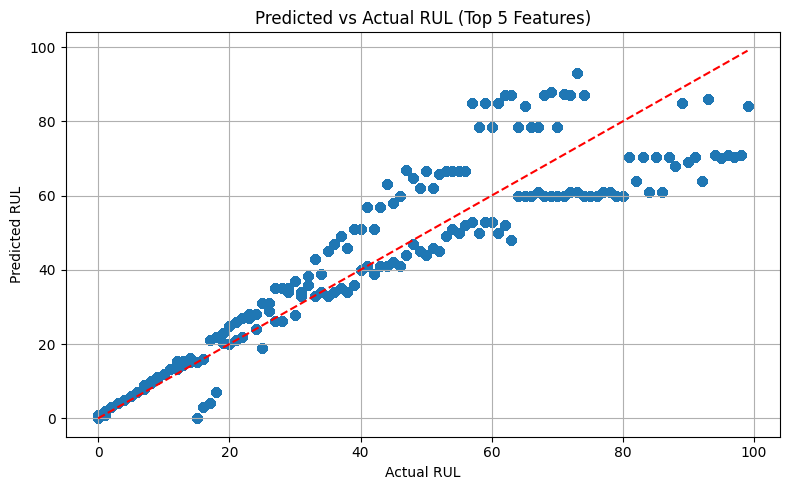

In [74]:
plt.figure(figsize = (8, 5))
plt.scatter(y_test, y_pred_sel, alpha = 0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL (Top 5 Features)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
import joblib
joblib.dump(rf_sel_5, 'rf_rul_model.pk1')
joblib.dump(scaler_sel_5, 'rul_scaler.pk1')

['rul_scaler.pk1']